In [17]:
# Importing the required dependencies or libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
pyo.init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [27]:
# Loading and reading the dataset
url = "https://github.com/HamoyeHQ/HDSC-Introduction-to-Python-for-machine-learning/files/7768140/FoodBalanceSheets_E_Africa_NOFLAG.csv"
data = pd.read_csv(url, encoding='latin-1')
# data = pd.read_csv("./Data/FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding="latin-1")

In [31]:
# Displaying the first 5 rows
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [32]:
# Displaying the last 5 rows
data.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04
60942,181,Zimbabwe,2899,Miscellaneous,684,Fat supply quantity (g/capita/day),g/capita/day,0.04,0.05,0.03,0.02,0.01


In [33]:
# Get basic understanding of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [36]:
# Number of rows and columns
data.shape

(60943, 12)

In [38]:
# Various statistical measures of the dataset
data.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [40]:
# Checks whether the dataset contains any missing values or not
# 0 - Doesn't contain missing values
# 0 < - Contains missing values
data.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [65]:
# Handling the missing values of column 'Y2014'
data['Y2014'].value_counts()

0.00        27183
1.00         2624
2.00         1401
3.00         1074
0.01          924
            ...  
49.74           1
4569.00         1
861.00          1
7429.00         1
10239.00        1
Name: Y2014, Length: 4493, dtype: int64

In [66]:
data[['Y2014']] = data[['Y2014']].fillna(value=0)

In [67]:
# Handling the missing values of column 'Y2015'
data['Y2015'].value_counts()

0.00       25940
1.00        2587
2.00        1359
3.00        1069
0.01         975
           ...  
56.17          1
60.33          1
1496.00        1
3607.00        1
23.80          1
Name: Y2015, Length: 4520, dtype: int64

In [68]:
data[['Y2015']] = data[['Y2015']].fillna(value=0)

In [69]:
# Handling the missing values of column 'Y2016'
data['Y2016'].value_counts()

0.00       25962
1.00        2606
2.00        1447
3.00        1030
0.01         964
           ...  
29.64          1
9733.00        1
14.86          1
3457.00        1
23.81          1
Name: Y2016, Length: 4520, dtype: int64

In [70]:
data[['Y2016']] = data[['Y2016']].fillna(value=0)

In [71]:
# Handling the missing values of column 'Y2017'
data['Y2017'].value_counts()

0.00      25804
1.00       2653
2.00       1416
3.00       1079
0.01        951
          ...  
33.60         1
50.61         1
297.77        1
135.83        1
53.61         1
Name: Y2017, Length: 4537, dtype: int64

In [72]:
data[['Y2017']] = data[['Y2017']].fillna(value=0)

In [73]:
# Handling the missing values of column 'Y2018'
data['Y2018'].value_counts()

0.00       26154
1.00        2508
2.00        1381
3.00        1035
0.01         968
           ...  
9.03           1
14.68          1
9.68           1
2960.00        1
6172.00        1
Name: Y2018, Length: 4591, dtype: int64

In [74]:
data[['Y2018']] = data[['Y2018']].fillna(value=0)

In [75]:
# All missing values are handled
data.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
dtype: int64

In [141]:
element_code = data["Element Code"]
Y2014 = data["Y2014"]
Y2015 = data["Y2015"]
Y2016 = data["Y2016"]
Y2017 = data["Y2017"]
print(max(element_code.corr(Y2014), element_code.corr(Y2015), element_code.corr(Y2016), element_code.corr(Y2017)))
print(element_code.corr(Y2014))

0.022984691712605566
0.022984691712605566


<AxesSubplot:>

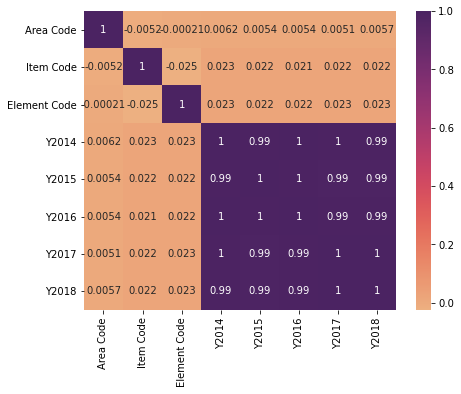

In [123]:
# Getting insights of the dataset using Heatmap
# corr() is used to find the pairwise correlation of all columns in the dataframe
plt.figure(figsize=(7, 5.5))
sns.heatmap((data).corr(), annot=True, cmap='flare')

In [131]:
data['Area'].nunique()

49

In [102]:
data.groupby('Item').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
"Alcohol, Non-Food",38447,752497,1515090,2403.00,2180.00,2223.00,2348.00,2293.00
Alcoholic Beverages,75016,1649136,2171381,102410.11,98783.72,96958.75,95581.06,97847.27
Animal Products,18060,397035,90990,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,85279,1882494,2567303,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,69280,1352989,1920418,9499.23,10559.15,9853.26,10198.90,9640.51
...,...,...,...,...,...,...,...,...
"Vegetables, Other",77779,1518715,2275409,155038.96,158104.08,156218.90,157752.59,163987.21
Vegetal Products,18060,391905,90990,107145.19,107064.17,106792.72,107655.20,107775.39
Wheat and products,87073,1639683,2654934,232670.13,234710.51,239377.07,240047.62,242645.19


In [106]:
data.groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


In [116]:
new_data = data[['Y2018','Element']]
new_data

,Y2018,Element
0,42228.00,Total Population - Both sexes
1,0.00,Domestic supply quantity
2,3322.00,Food supply (kcal/capita/day)
3,91.83,Protein supply quantity (g/capita/day)
4,77.28,Fat supply quantity (g/capita/day)
...,...,...
60938,16.00,Food
60939,1.08,Food supply quantity (kg/capita/yr)
60940,1.00,Food supply (kcal/capita/day)
60941,0.04,Protein supply quantity (g/capita/day)


In [121]:
new_data.groupby('Element').sum()

,Y2018
Element,
Domestic supply quantity,2161192.10
Export Quantity,181594.80
Fat supply quantity (g/capita/day),10258.69
Feed,233489.68
Food,1303841.28
Food supply (kcal/capita/day),455261.00
Food supply quantity (kg/capita/yr),49056.85
Import Quantity,287997.09
Losses,163902.00


In [150]:
another_data = data[["Area", "Y2018", "Element"]]
another_data

,Area,Y2018,Element
0,Algeria,42228.00,Total Population - Both sexes
1,Algeria,0.00,Domestic supply quantity
2,Algeria,3322.00,Food supply (kcal/capita/day)
3,Algeria,91.83,Protein supply quantity (g/capita/day)
4,Algeria,77.28,Fat supply quantity (g/capita/day)
...,...,...,...
60938,Zimbabwe,16.00,Food
60939,Zimbabwe,1.08,Food supply quantity (kg/capita/yr)
60940,Zimbabwe,1.00,Food supply (kcal/capita/day)
60941,Zimbabwe,0.04,Protein supply quantity (g/capita/day)


In [162]:
another_data.groupby("Element", "Area" == "Algeria").sum()

,Y2018
Element,
Domestic supply quantity,2161192.10
Export Quantity,181594.80
Fat supply quantity (g/capita/day),10258.69
Feed,233489.68
Food,1303841.28
Food supply (kcal/capita/day),455261.00
Food supply quantity (kg/capita/yr),49056.85
Import Quantity,287997.09
Losses,163902.00
